# Programme for International Student Assessment (PISA)
## by (Haitham Essam)

## Investigation Overview
In this investigation, I am interested to know what makes the student gets high marks with the least effort and what is the role of student and teacher. 


## Dataset Overview
The data consists of information regarding 48,5490 students, including
grade, srudent's mindset, teacher's role, facilities and other properties. 
The dataset can be found [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1611166993106000&usg=AOvVaw2584P2MKVx610FBqEiZvDp)
with it's dictionary [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv&sa=D&ust=1611166993108000&usg=AOvVaw27_q_LEUoTD8Vqte3EpVkB)
with feature documentation available [here](http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm), [here](http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm) and [here](http://www.oecd.org/pisa/data/pisa2012technicalreport.htm)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [69]:
# load in the dataset into a pandas dataframe
pisa_df=pd.read_csv("pisa2012.csv", encoding='latin-1')

In [3]:
# renaming the columns
agree_disagree_df_clean=pd.read_csv("agree_disagree_df_clean.csv")

In [4]:
# The list that contains the new name of the columns in order
    
teacher_roles_df_clean=pd.read_csv("teacher_roles_df_clean.csv")

In [5]:
# The list that contains the new name of the columns in order
# p==>what did he do when facing a problem

student_roles_df_clean=pd.read_csv("student_roles_df_clean.csv")

## Student studying with parents
Students don't study much time with parents max 2 hours, as if we draw the barchar we wil see that two hours will get the first place by more than 210,000.

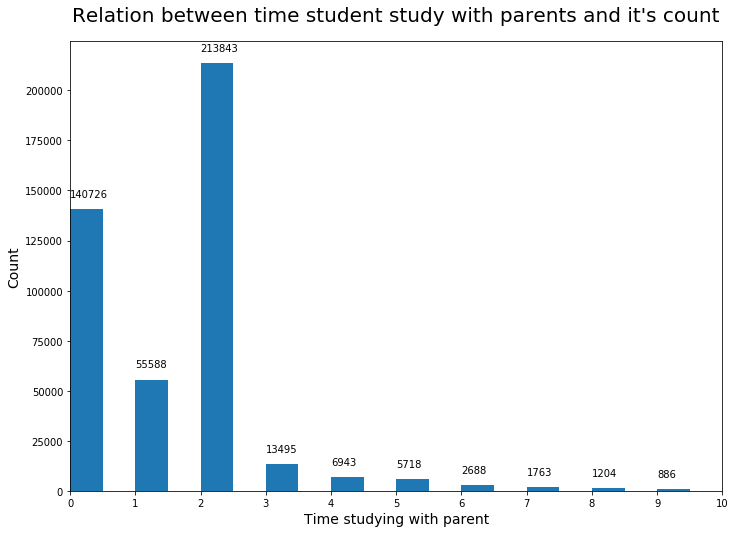

In [81]:
# plot the time studing with parent
plt.figure(figsize=[ 11.69, 8.27]) 
plt.hist(data=student_roles_df_clean, x="with_parent", bins=60);
plt.xticks(list(range(11)))

for i in range (10):
    count = student_roles_df_clean.with_parent.value_counts()[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+10000, count, ha = 'left', va='top')
# set labels
plt.xlabel("Time studying with parent", size=14)
plt.ylabel("Count", size=14)
plt.title("Relation between time student study with parents and it's count", size=20, pad=20)
plt.xlim(0,10);

## Student with computer
Most of them  don't spend much time on computer to study max 2 hours, also two hours get the first place by more than 210,000.

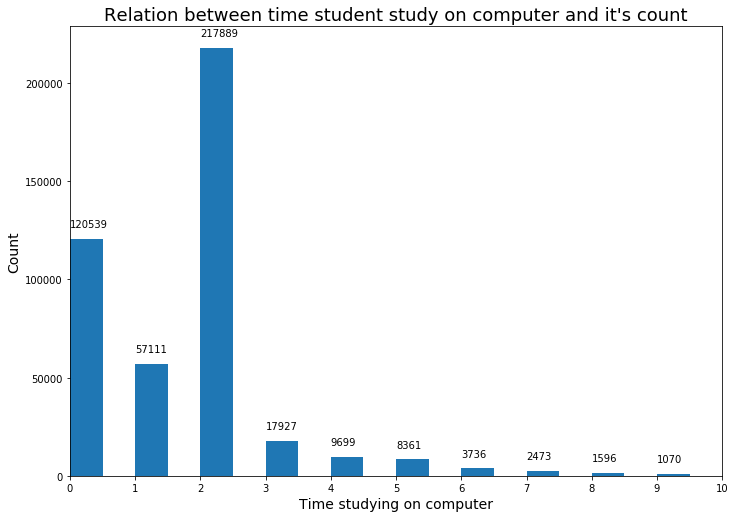

In [82]:
# plot the time studing on computer
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=student_roles_df_clean, x="computer", bins=60);
plt.xticks(list(range(11)))

for i in range (10):
    count = student_roles_df_clean.computer.value_counts()[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+10000, count, ha = 'left', va='top')

plt.xlabel("Time studying on computer", size=14)
plt.ylabel("Count", size=14)
plt.title("Relation between time student study on computer and it's count", size=18)
plt.xlim(0,10);

## Student and study time
Six hour for studying is a popular time, if we look at the next barchar we will see average or most studying time density from 0.1 to 0.2 but six hours got more than 0.8 which make it very popular.

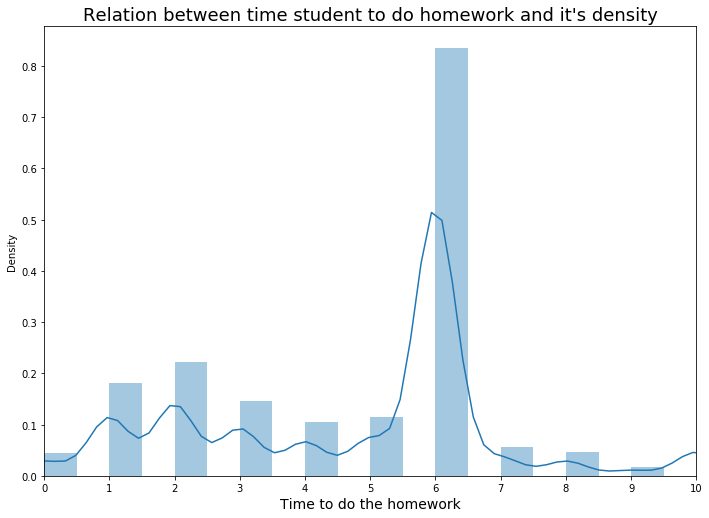

In [83]:
# plot the time to do the homework
plt.figure(figsize=[ 11.69, 8.27])
default_color = sb.color_palette()[0]
sb.distplot(student_roles_df_clean.homework, bins=60, color = default_color);

plt.xticks(list(range(11)))
plt.xlabel("Time to do the homework", size=14)
plt.title("Relation between time student to do homework and it's density", size=18)
plt.xlim(0,10);

## Students studying the homework
Student spends less hour in the guided homework, as most popular hour in guided homework is two hours which is less than home work which is six.

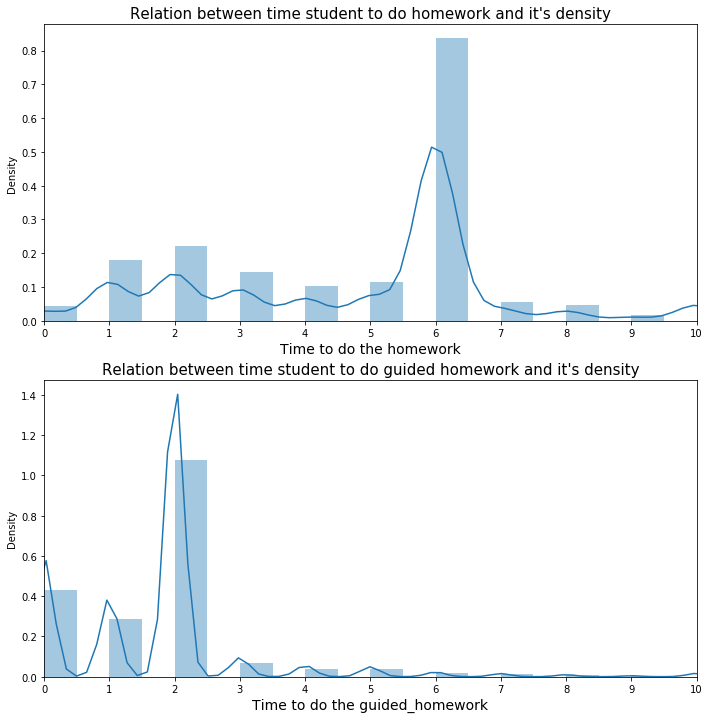

In [94]:
plt.figure(figsize=[ 11.69, 12])

# subplot 1: homework
plt.subplot(2, 1, 1)
# plot the time to do the homework
sb.distplot(student_roles_df_clean.homework, bins=60, color = default_color);

plt.xticks(list(range(11)))
plt.xlabel("Time to do the homework", size=14)
plt.title("Relation between time student to do homework and it's density", size=15)
plt.xlim(0,10);

# subplot 2: guided_homework
plt.subplot(2, 1, 2)
# plot the time to do the guided_homework
sb.distplot(student_roles_df_clean.guided_homework, bins=60, color = default_color);
plt.xticks(list(range(11)))

plt.title("Relation between time student to do guided homework and it's density", size=15)
plt.xlabel("Time to do the guided_homework", size=14)
plt.xlim(0,10);

In [21]:
def make_boxplot(var_list, width=20, height=40):
    """
        Make boxplot for each variable alone with grade
        var_list: list of our variables
    """
    nrows=int(np.ceil(len(var_list)/2))
    ncols=2
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [width,height])

    default_color = sb.color_palette()[0]
    for i in range(len(var_list)): 
        sb.boxplot(data = agree_disagree_df_clean, x = var_list[i], y=agree_disagree_df_clean.grade,
                   color = default_color, ax = ax[i//ncols,i%ncols])

    plt.show()

In [22]:
def make_dist(var_list, table):
    """
        Make a distribution for each variable alone with grade
        var_list: list of our variables
    """
    
    for var in var_list:
        group_means = table.groupby([var]).mean()
        group_order = group_means.sort_values(['grade'], ascending = False).index

        g = sb.FacetGrid(data = table, col = var, col_wrap = 4, height = 4)
        g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
        g.set_ylabels(var, size=14)
        g.set_xlabels("Grade", size=14)

        g.set_titles('{col_name}', size=14)

## Believes and grades
Believes affects the grades. Good believes and self confident lead to high grades and bad believes leads to poor grades

In [23]:
student_ideas=["worry_that_it_will_be_difficult", "believe_not_good_at_maths", "very_tense_math", "believe_good_grades_in_math",
              "very_nervous_math", "learn_quickly_math", "math_one_of_best_subjects", "feel_helpless", "understand_difficult_work",
              "worry_about_getting_poor_grades", "can_succeed_with_enough_effort", "doing_well_is_completely_up_to_me",
              "family_demands_and_problems", "different_teachers", "if_i_wanted_i_could_perform_well", "perform_poorly_regardless"]


In [24]:
# convert the degree of agree columns in the table into ordered categorical types
ordinal_var_dict = {}

for col in student_ideas:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

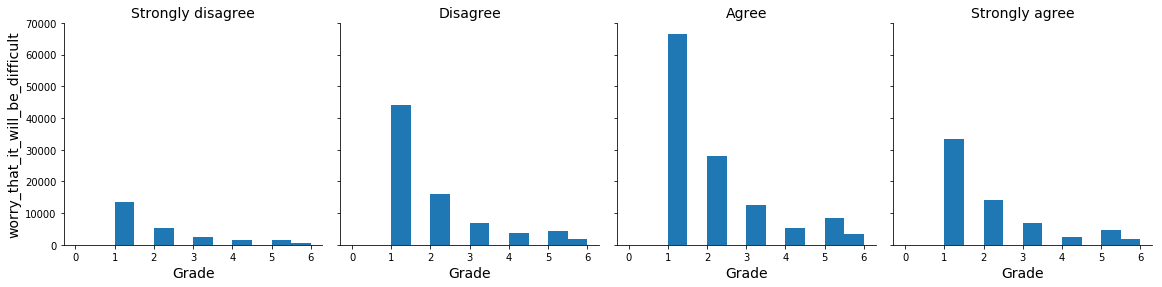

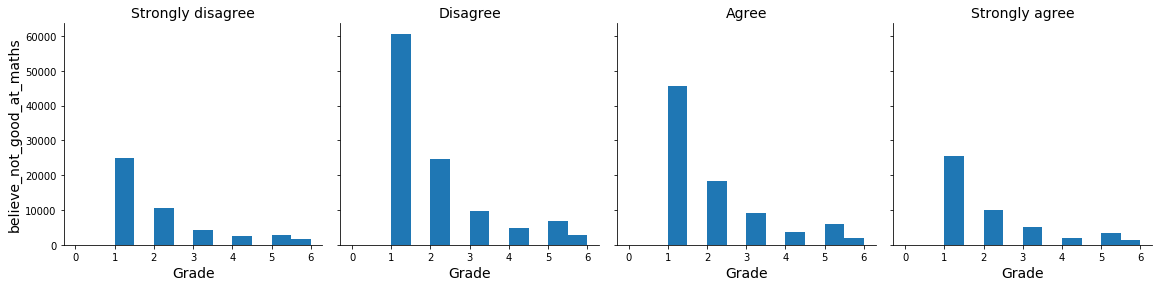

In [26]:
# Let's see the distribution for each one alone
for var in student_ideas[:2]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

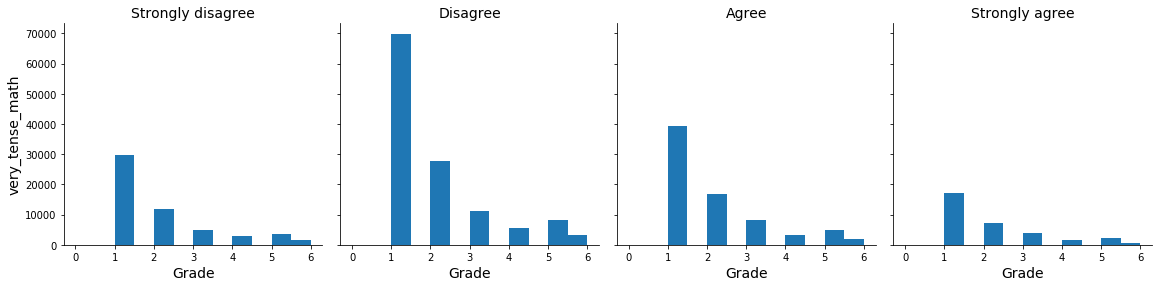

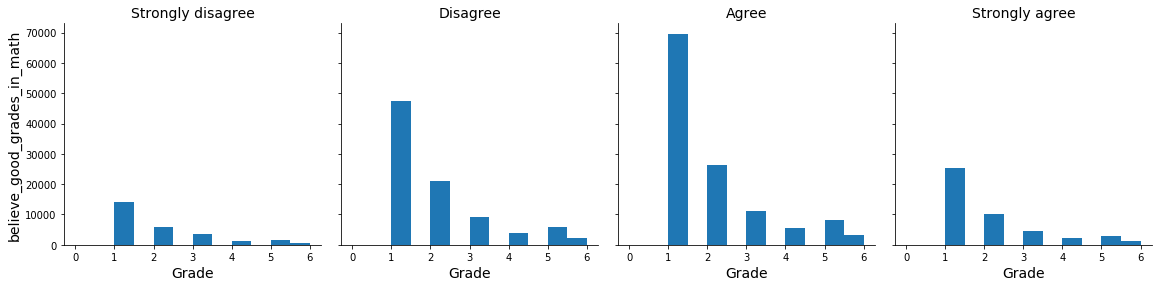

In [28]:
# Let's see the distribution for each one alone
for var in student_ideas[2:4]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

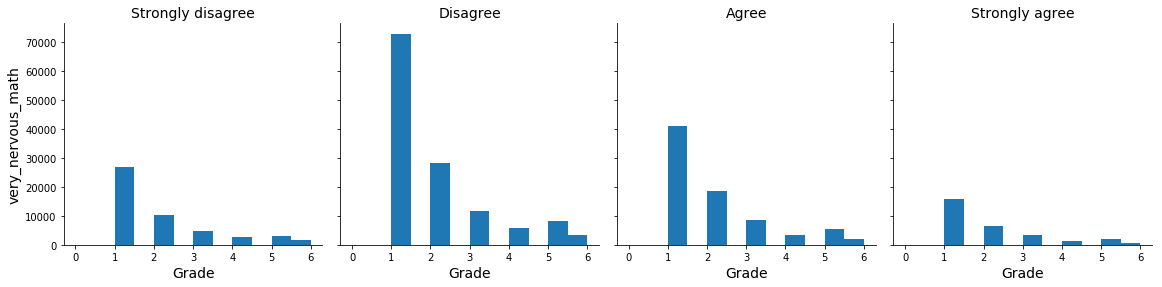

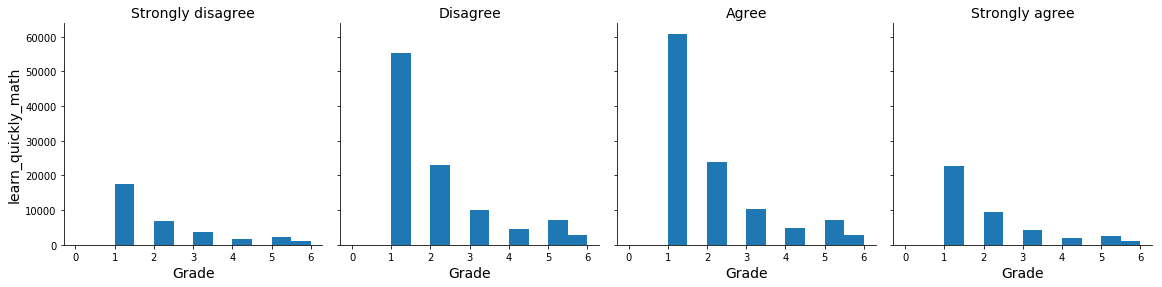

In [29]:
# Let's see the distribution for each one alone
for var in student_ideas[4:6]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

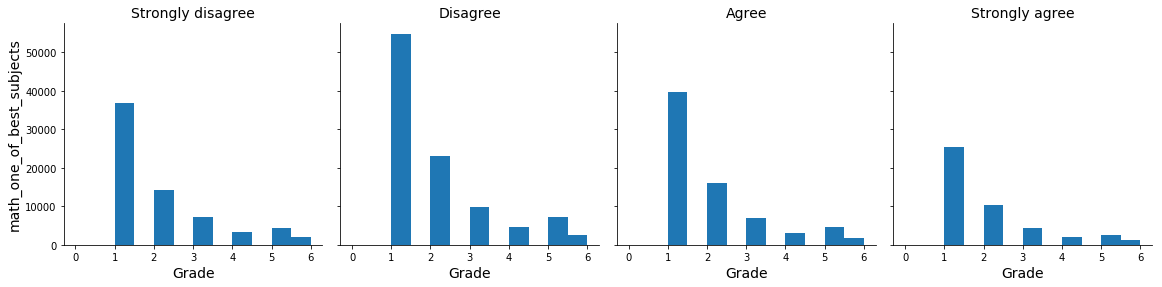

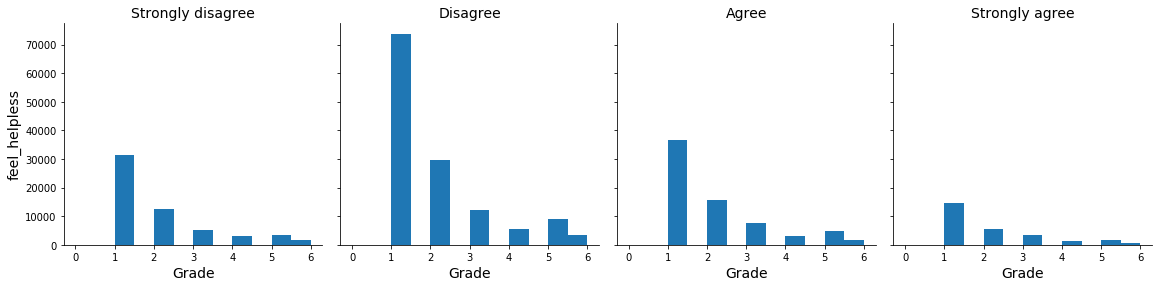

In [30]:
# Let's see the distribution for each one alone
for var in student_ideas[6:8]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

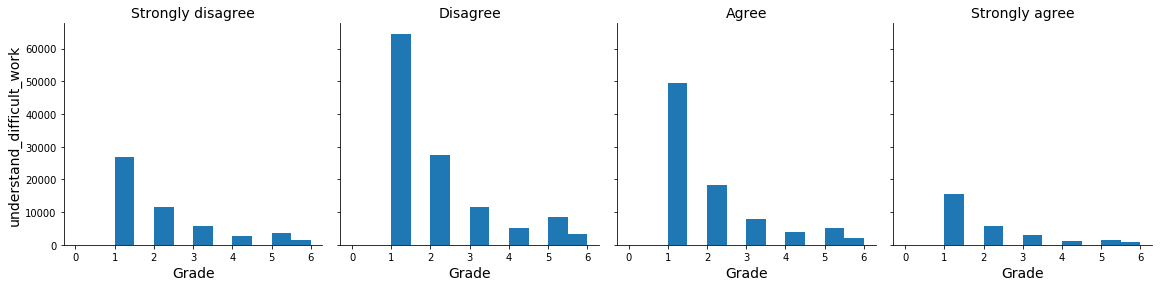

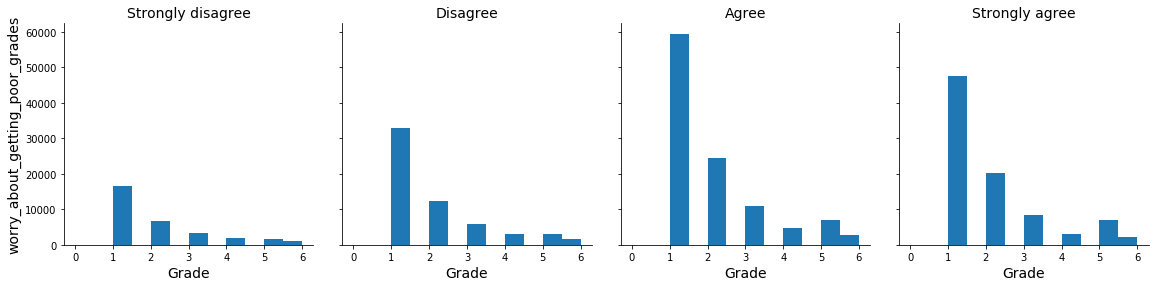

In [31]:
# Let's see the distribution for each one alone
for var in student_ideas[8:10]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

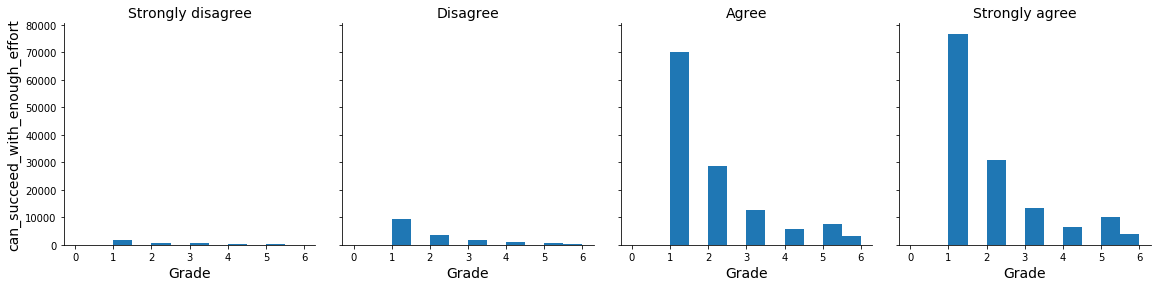

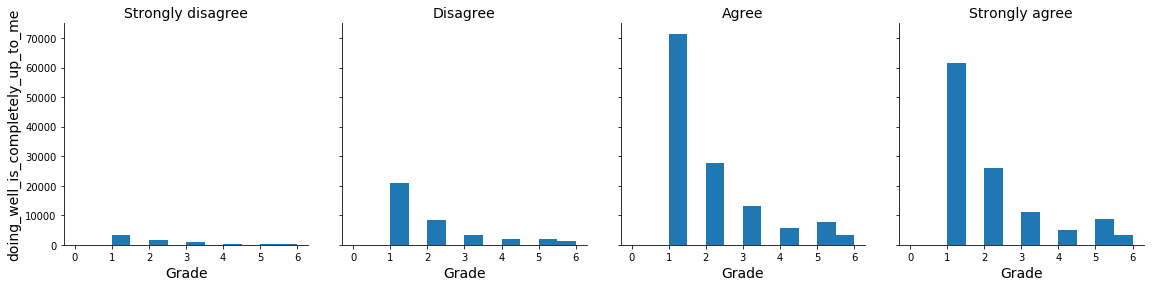

In [32]:
# Let's see the distribution for each one alone
for var in student_ideas[10:12]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

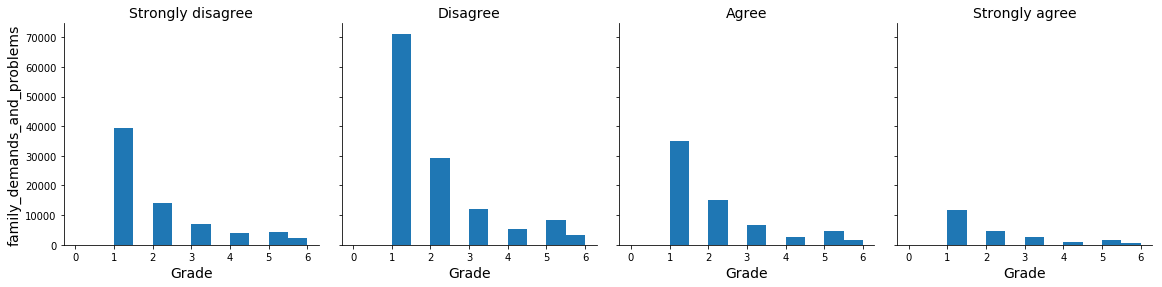

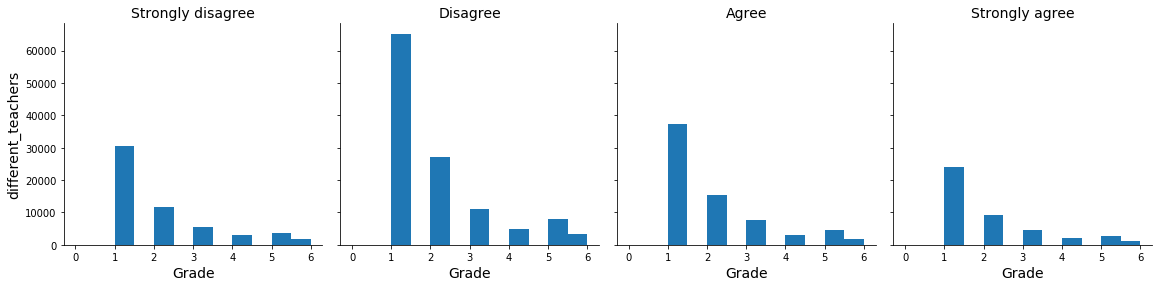

In [33]:
# Let's see the distribution for each one alone
for var in student_ideas[12:14]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

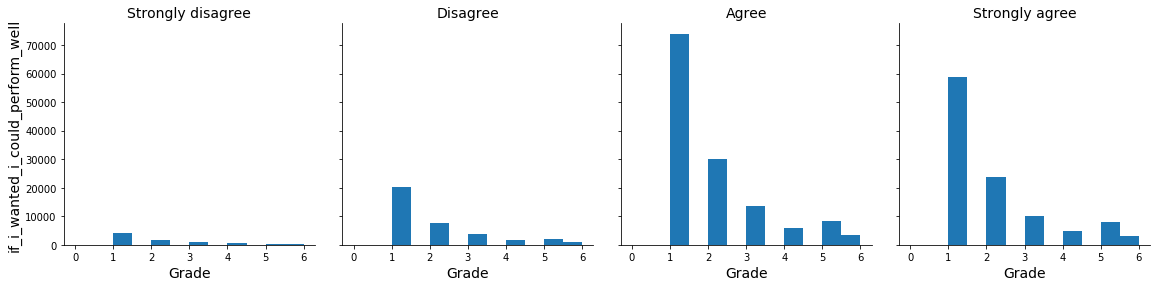

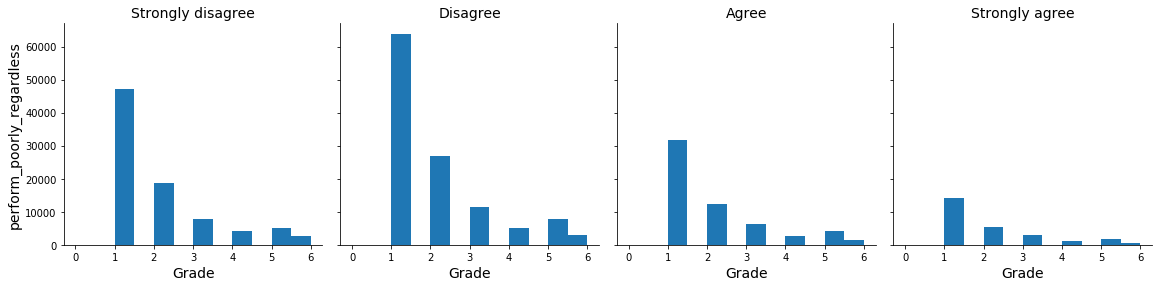

In [34]:
# Let's see the distribution for each one alone
for var in student_ideas[14:16]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

In [41]:
student_effort=["homework_completed_in_time", "work_hard_on_homework", "prepared_for_exams", "study_hard_for_quizzes", 
               "study_until_i_understand_everything", "pay_attention_in_classes", "listen_in_classes", 
                "avoid_distractions_when_studying", "keep_work_organized"]


In [42]:
# convert the degree of agree columns in the table into ordered categorical types
ordinal_var_dict = {}

for col in student_effort:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

## Effort and grades
As student exerts more effort the grade increases

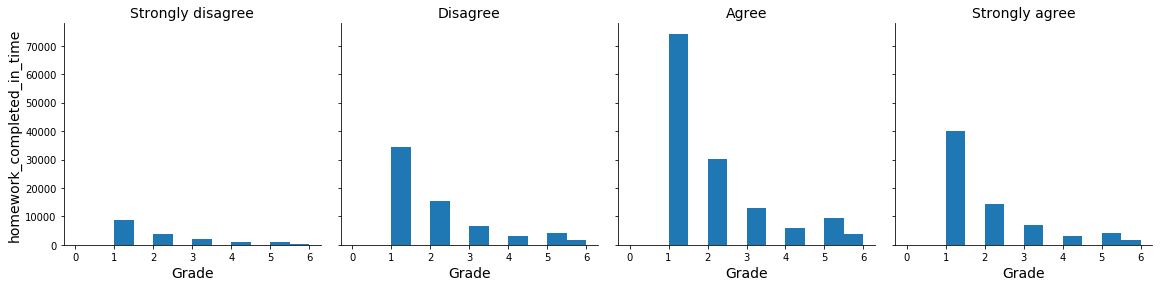

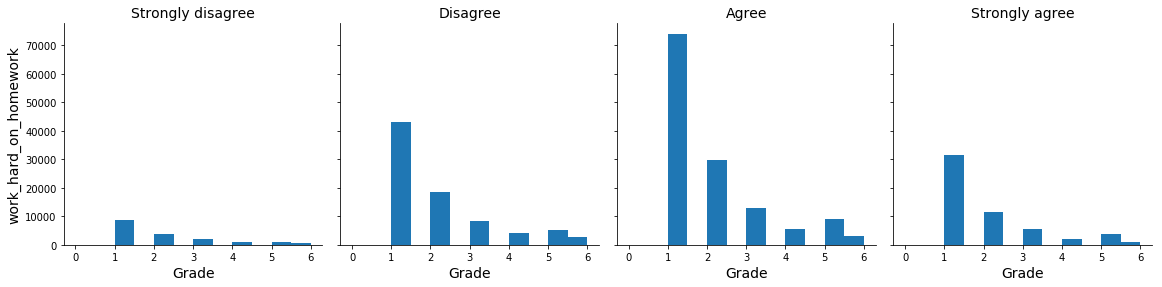

In [43]:
# Let's see the distribution for each one alone
for var in student_effort[:2]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

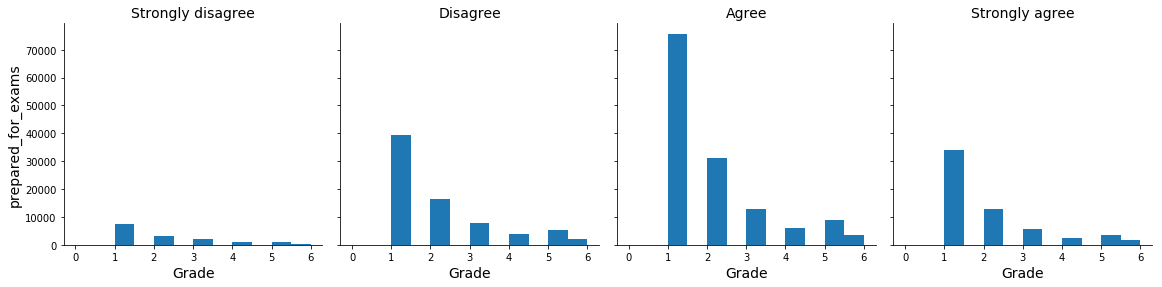

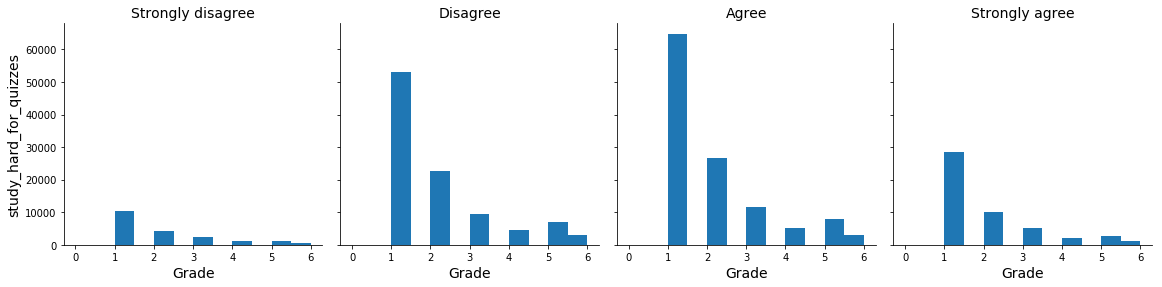

In [44]:
# Let's see the distribution for each one alone
for var in student_effort[2:4]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

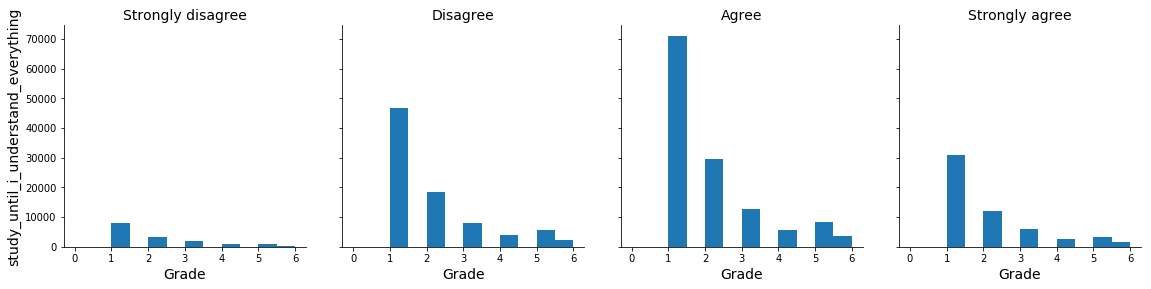

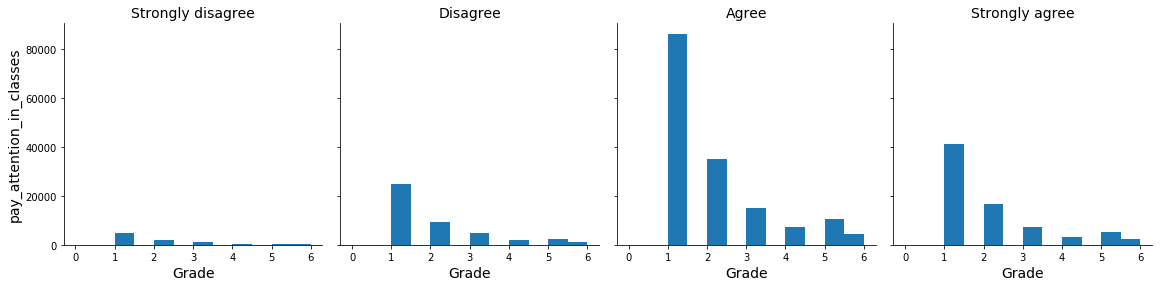

In [45]:
# Let's see the distribution for each one alone
for var in student_effort[4:6]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

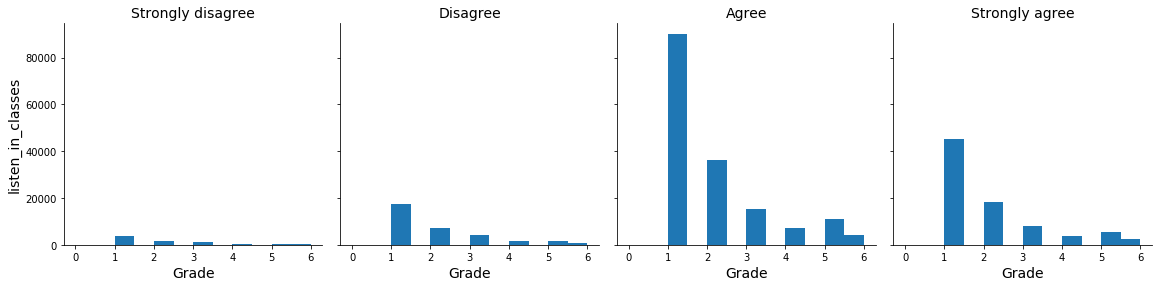

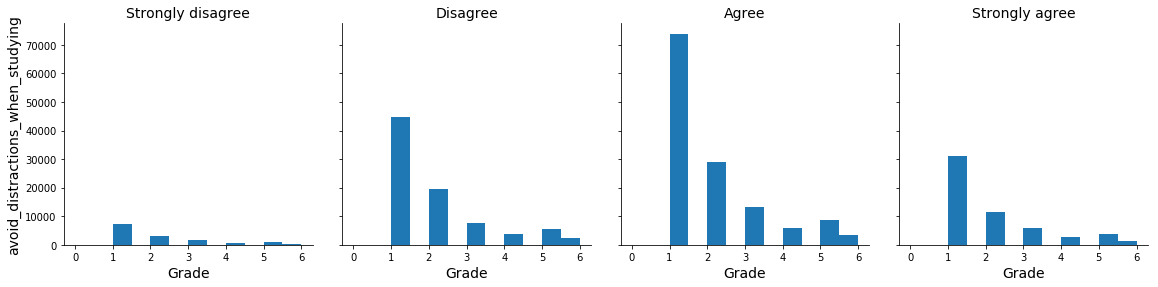

In [46]:
# Let's see the distribution for each one alone
for var in student_effort[6:8]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

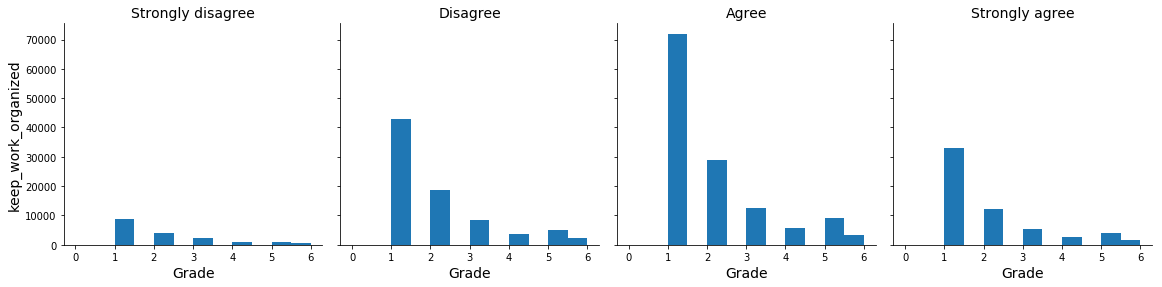

In [48]:
# Let's see the distribution for each one alone
for var in student_effort[8:10]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

## Psychology and grades
Psychological state affect the grade. As psychological state enhances the student's grade enhances.

In [49]:
# convert the degree of agree columns in the table into ordered categorical types
vari=["feel_lonely_at_school", "feel_happy_at_school", "things_are_ideal_at_school", "satisfied_at_school"]
ordinal_var_dict = {}

for col in vari:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

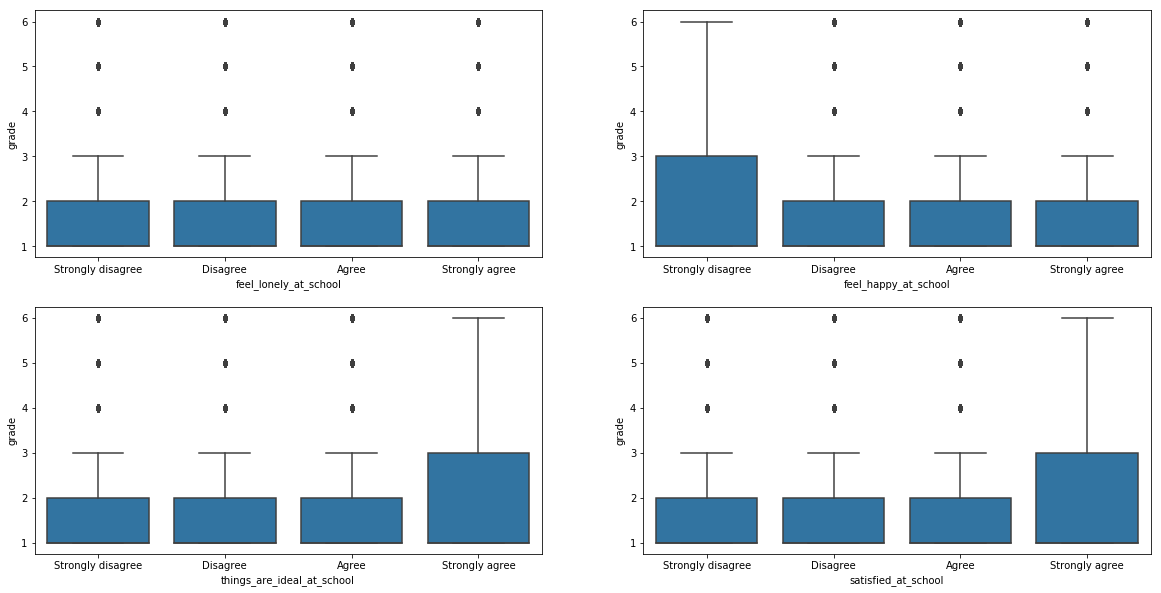

In [50]:
# Let's see the relation with the grade usin boxplot
make_boxplot(vari, 20, 10)

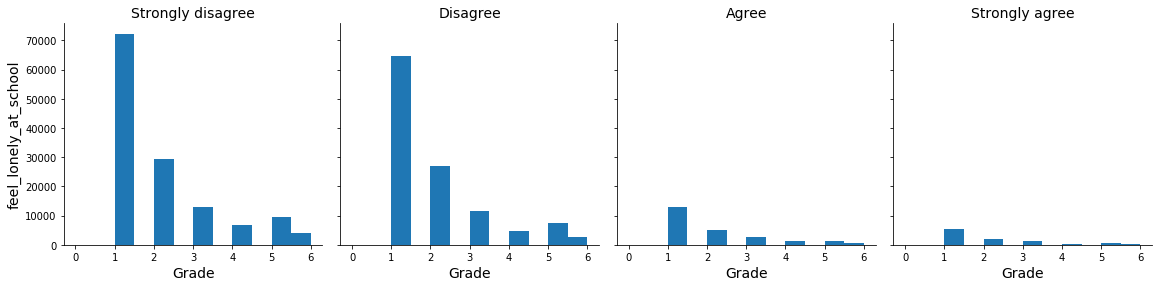

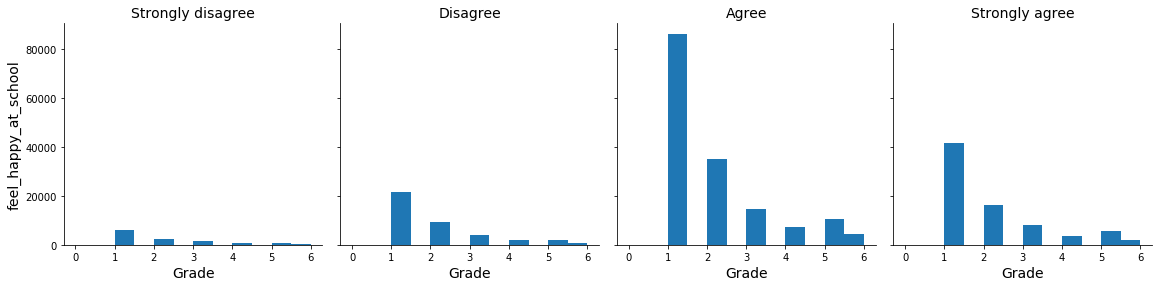

In [51]:
# Let's see the distribution for each one alone
for var in vari[:2]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

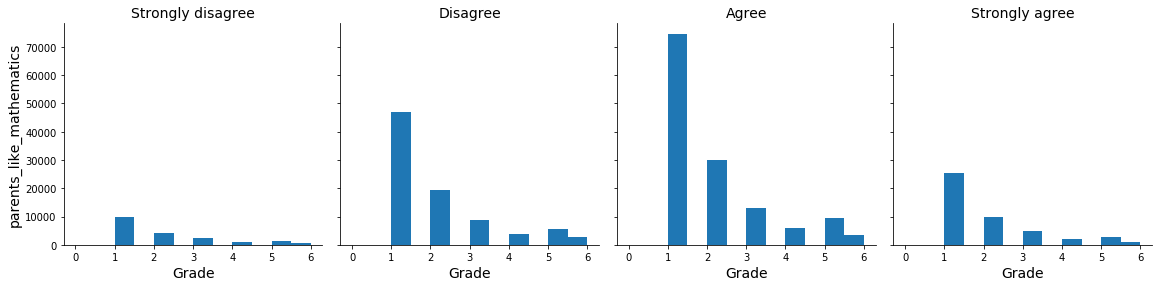

In [75]:
# Let's see the distribution for each one alone
for var in vari[2:4]:
    group_means = agree_disagree_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = agree_disagree_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

## Parents and grades
Parents beliefs affects students grades. When parents think this subject is important or they just they like it the student's grade increases.

In [55]:
# convert the degree of agree columns in the table into ordered categorical types
vari=["parents_believe_studying_mathematics_is_important", "parents_believe_mathematics_is_important_for_career",
           "parents_like_mathematics"]

ordinal_var_dict = {}

for col in vari:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

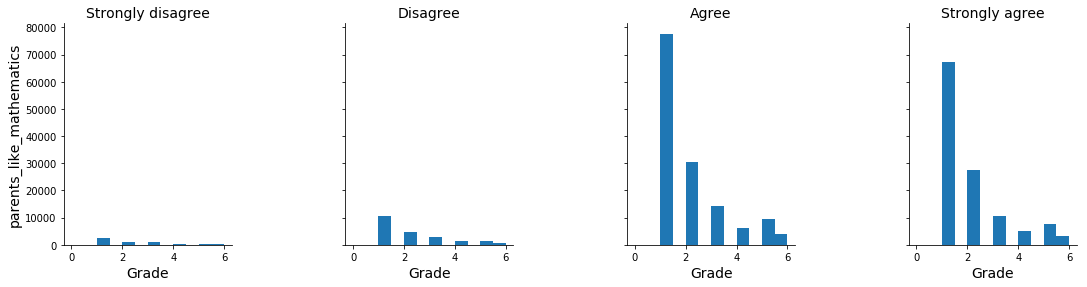

In [57]:
# Let's see the distribution for each one alone

group_means = agree_disagree_df_clean.groupby([vari[0]]).mean()
group_order = group_means.sort_values(['grade'], ascending = False).index

g = sb.FacetGrid(data = agree_disagree_df_clean, col = vari[0], col_wrap = 4, height = 4)
g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
g.set_ylabels(var, size=14)
g.set_xlabels("Grade", size=14)

g.set_titles('{col_name}', size=14);

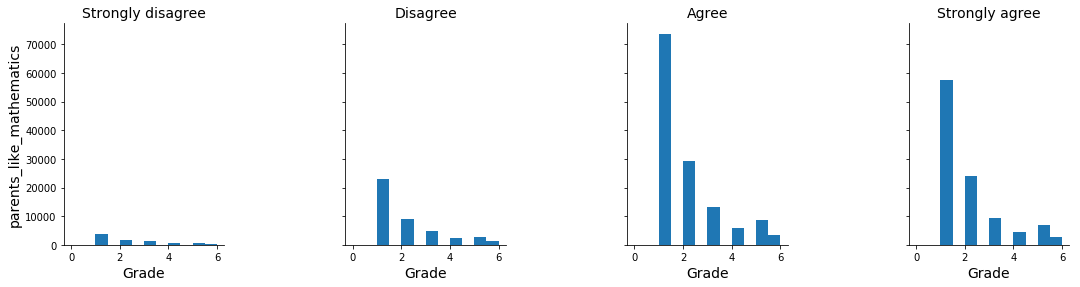

In [58]:
# Let's see the distribution for each one alone

group_means = agree_disagree_df_clean.groupby([vari[1]]).mean()
group_order = group_means.sort_values(['grade'], ascending = False).index

g = sb.FacetGrid(data = agree_disagree_df_clean, col = vari[1], col_wrap = 4, height = 4)
g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
g.set_ylabels(var, size=14)
g.set_xlabels("Grade", size=14)

g.set_titles('{col_name}', size=14);

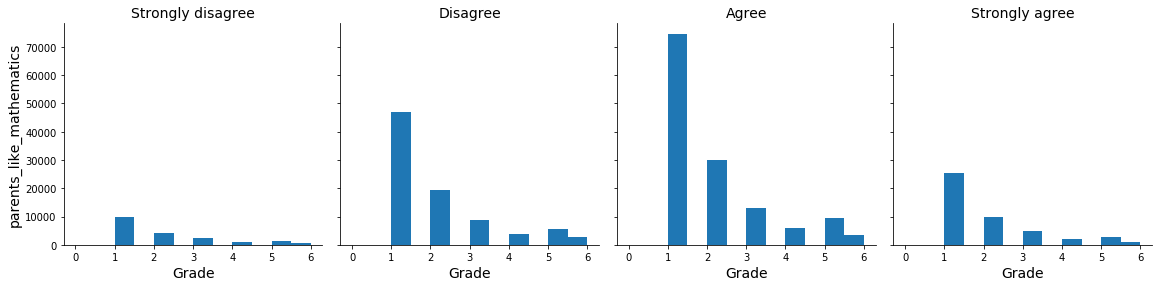

In [59]:
# Let's see the distribution for each one alone

group_means = agree_disagree_df_clean.groupby([vari[2]]).mean()
group_order = group_means.sort_values(['grade'], ascending = False).index

g = sb.FacetGrid(data = agree_disagree_df_clean, col = vari[2], col_wrap = 4, height = 4)
g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
g.set_ylabels(var, size=14)
g.set_xlabels("Grade", size=14)

g.set_titles('{col_name}', size=14);


## Teachers and grades
Setting goals is important to get high grades and as you remind your self or your students increases the grades
Encourge to think and reasoning is poitive relation with grades as you encourge student more grades increases
giving feedback does not affect the grades very much checks understanding affects the grades tremendously summarizing affects the grades a bit listing of how to get better increases the grades

In [62]:
# convert the degree of agree columns in the table into ordered categorical types
teacher_instructions=["sets_clear_goals", "encourages_thinking_and_reasoning", "gives_feedback", "checks_understanding",
                      "summarizes_previous_lessons", "gives_feedback_on_strengths_and_weaknesses", "informs_about_expectations",
                      "informs_about_learning_goals", "tells_how_to_get_better",]
                     

ordinal_var_dict = {}

for col in teacher_instructions:
    ordinal_var_dict[col]=['Never or Hardly Ever', 'Some Lessons',  'Most Lessons','Every Lesson']
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    teacher_roles_df_clean[var] = teacher_roles_df_clean[var].astype(ordered_var)

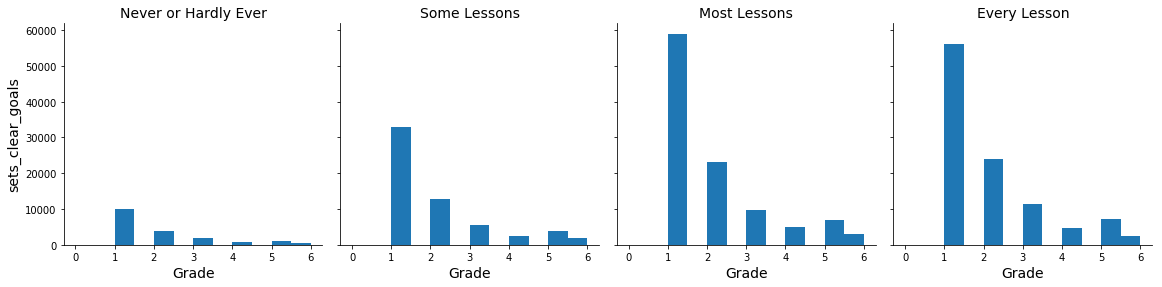

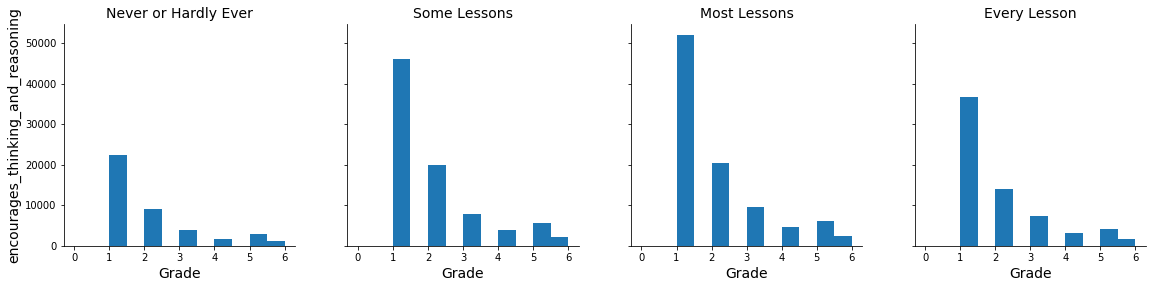

In [63]:
# Let's see the distribution for each one alone
for var in teacher_instructions[:2]:
    group_means = teacher_roles_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = teacher_roles_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

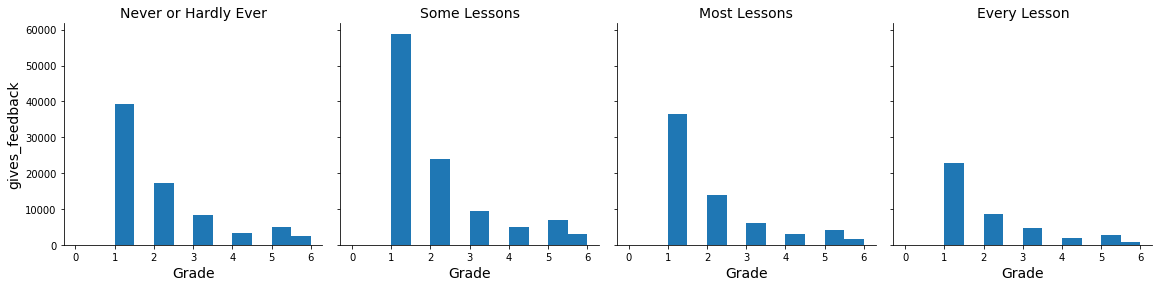

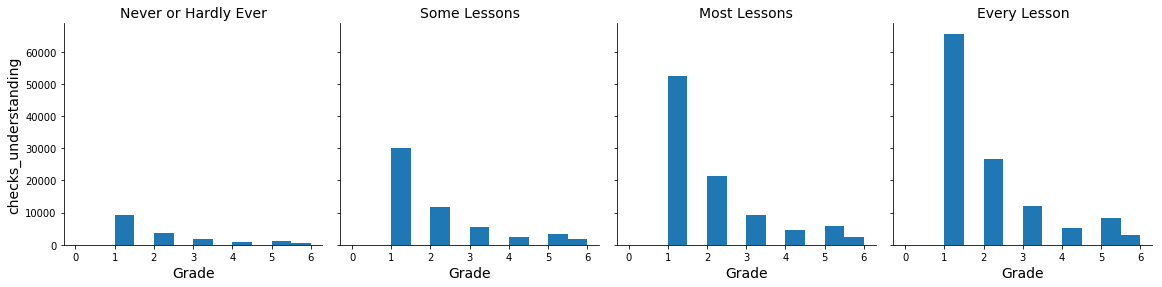

In [64]:
# Let's see the distribution for each one alone
for var in teacher_instructions[2:4]:
    group_means = teacher_roles_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = teacher_roles_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

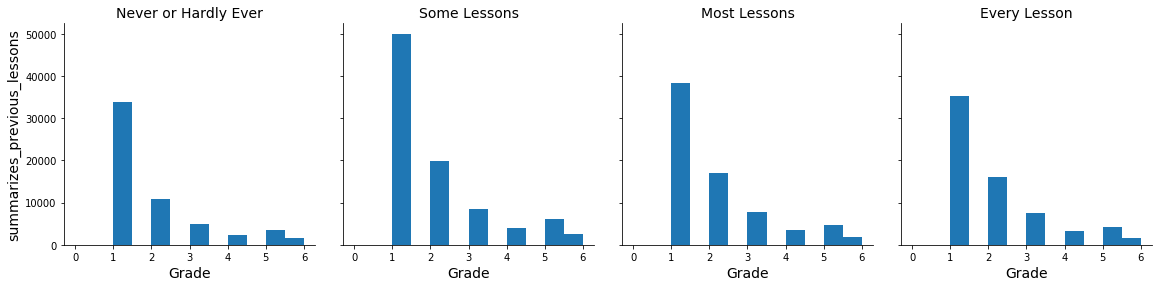

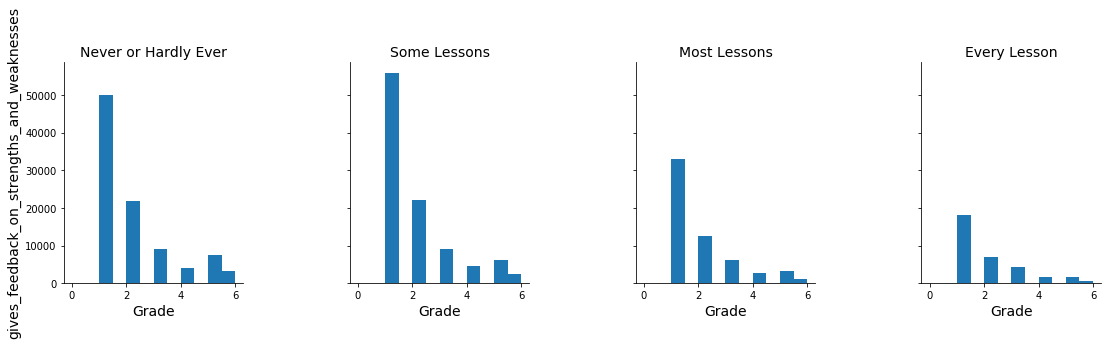

In [65]:
# Let's see the distribution for each one alone
for var in teacher_instructions[4:6]:
    group_means = teacher_roles_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = teacher_roles_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

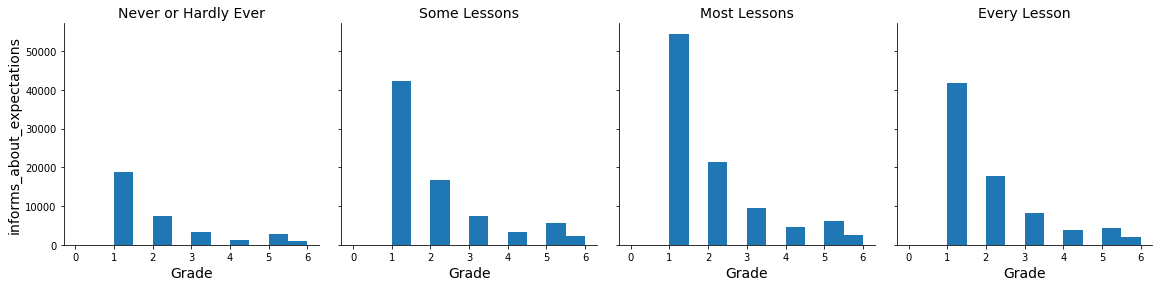

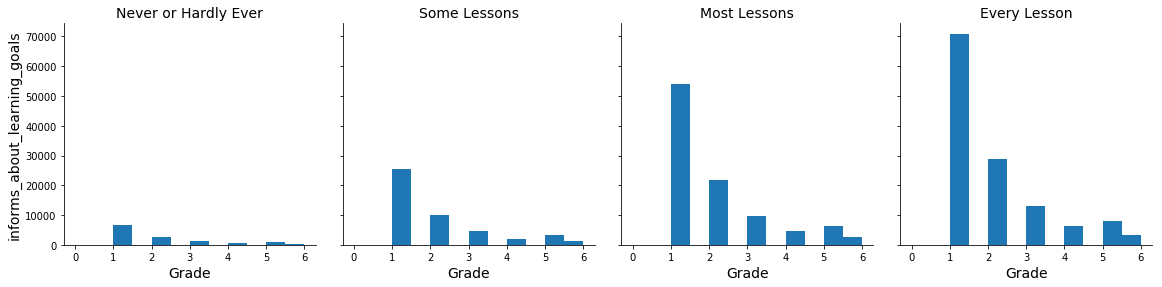

In [66]:
# Let's see the distribution for each one alone
for var in teacher_instructions[6:8]:
    group_means = teacher_roles_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = teacher_roles_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

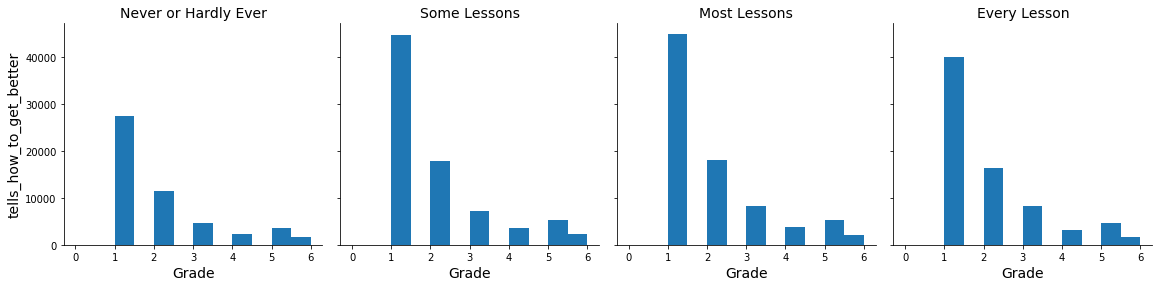

In [67]:
# Let's see the distribution for each one alone
for var in teacher_instructions[8:10]:
    group_means = teacher_roles_df_clean.groupby([var]).mean()
    group_order = group_means.sort_values(['grade'], ascending = False).index

    g = sb.FacetGrid(data = teacher_roles_df_clean, col = var, col_wrap = 4, height = 4)
    g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
    g.set_ylabels(var, size=14)
    g.set_xlabels("Grade", size=14)

    g.set_titles('{col_name}', size=14)

## Homework every day with students completing it
Teacher who gives H.W. everyday back in time with student complete it in time get higher grades. <br>
If we looked at the next charts we will see string positive reations between high grades and homework everyday back in time in heatmap and students who took H.w. everyday and complete it in time get the highest grade in pointplot

In [70]:
# Let's order them first 
var=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
cols=["ST46Q01", "ST46Q02", "ST46Q03", "ST46Q04", "ST46Q05", "ST46Q06", "ST46Q07", "ST46Q08", "ST46Q09", 
      "ST82Q01", "ST82Q02", "ST82Q03", "ST83Q01"]   

for col in cols:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
    pisa_df[col] = pisa_df[col].astype(ordered_var)

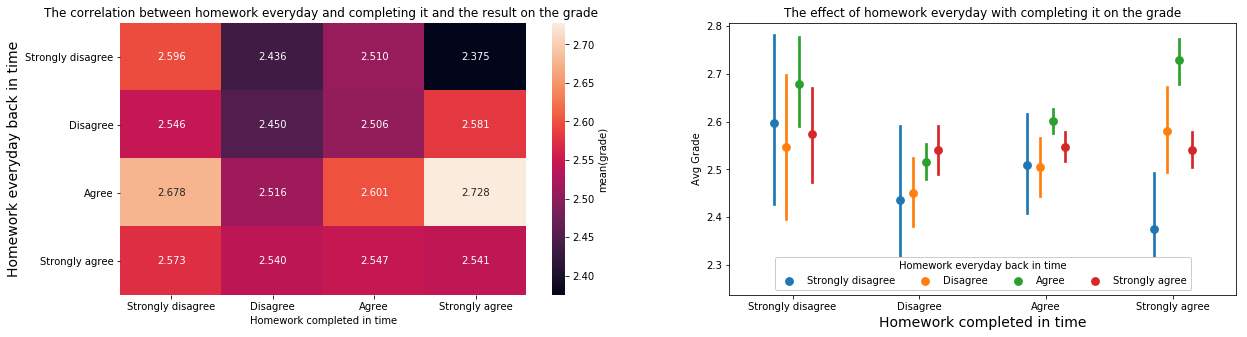

In [88]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
cat_means = pisa_df.groupby(['ST46Q01', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q01',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time", size=14)
plt.xlabel("Homework completed in time");
plt.title("The correlation between homework everyday and completing it and the result on the grade ")

plt.subplot(1, 2 , 2)
# Let's draw realtion in pointplot
ax = sb.pointplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade", size=10)
ax.set_xlabel("Homework completed in time", size=14);
ax.set_title("The effect of homework everyday with completing it on the grade");

## Homework once/week with students completing it
Homework once a week back in time get higher grades than everyday <br>
Student who complete homework in time with teacher giving homework once a week back in time gets higher grades.<br>
Student who didn't complete homework even took it once a week not back in time or not get an average grade<br>

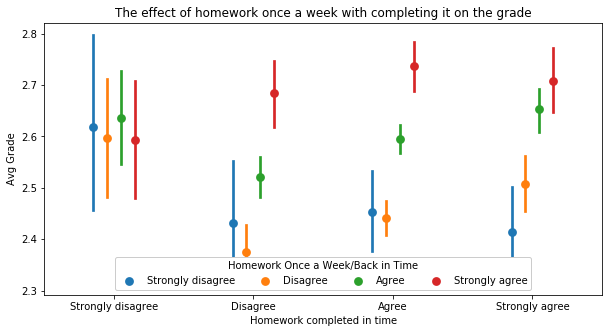

In [85]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q02',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework Once a Week/Back in Time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time");
ax.set_title("The effect of homework once a week with completing it on the grade");

## Homework every day with students preparing for exam
Students who took homework everyday back in time got higher grades regardless prepared for exam or not

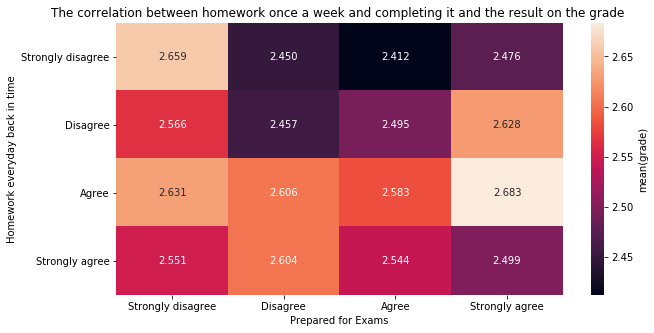

In [80]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q03', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q03',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.title("The correlation between homework once a week and completing it and the result on the grade ")
plt.ylabel("Homework everyday back in time")
plt.xlabel("Prepared for Exams");

## Avoid distractions when studying with homework everyday
Students who avoid distractions when studying got higher grades and in the heatmap the correlation may be because at students who don't avoid distractions and got the highest grades this may be an outliers

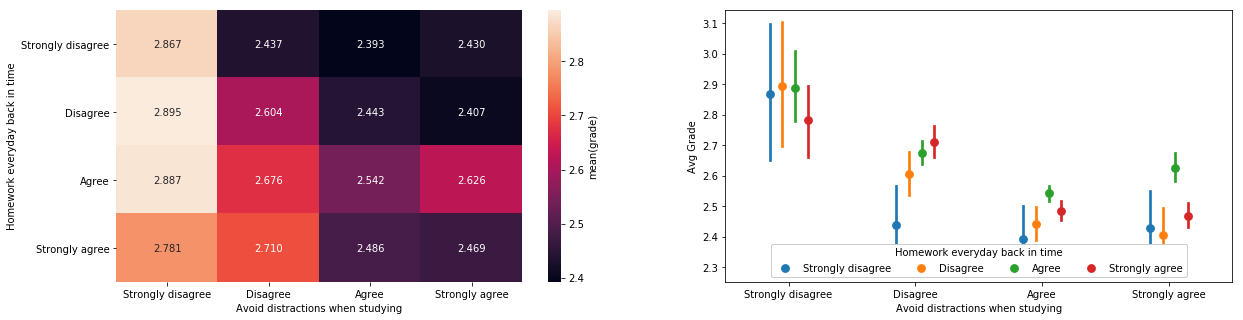

In [90]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
cat_means = pisa_df.groupby(['ST46Q08', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q08',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Avoid distractions when studying");

plt.subplot(1, 2, 2)
# Let's draw realtion in pointplot
# Change figure size to be bigger

ax = sb.pointplot(data = pisa_df, x = 'ST46Q08', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Avoid distractions when studying");